### Group 3 - Term project - Predictive Maintenance
- Bhatt, Harsh Udaybhai
- Chen, Chia Hung
- Dossayeva, Zarina
- Gosrani, Jash Mayur
- Henao Barrios, Juan
- Kaczur, Robert
- Kunwar, Bikesh
- Patel, Jeet


| TOC                                 |
|-------------------------------------|
| [Logistic Regression](#logreg)      |
| [Decision Tree](#dt)                |
| [Random Forest](#rf)                |
| [Stochastic Gradient Descent](#sgd) |
| [Support Vector Machine](#svm)      |

### Imports

In [76]:
import time
import numpy as np
import pandas as pd

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from joblib import dump

In [77]:
df = pd.read_csv(r"C:\aiprojects\predictive-maintenance\ai4i2020.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [78]:
df = df.drop(['UDI', 'Product ID'], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [79]:
df_cat = df[['Type']]
df_cat

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


In [80]:
df_num = df.drop(['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [82]:
df_num = scaler.fit_transform(df_num)
df_num

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [83]:
df_num = pd.DataFrame(df_num, columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'
    , 'Torque [Nm]', 'Tool wear [min]'])
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336
9996,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.402174,0.358025,0.277648,0.406593,0.086957
9998,0.402174,0.370370,0.139697,0.614011,0.098814


In [84]:
# Alternate method for converting catagorical data to numerical data
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# cat = encoder.fit_transform(df_cat[['Type']]).toarray()

In [85]:
cat = pd.get_dummies(df_cat[['Type']], dtype=float)
df_cat = pd.DataFrame(cat)

df_cat

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [86]:
X = pd.concat([df_cat, df_num], axis=1)
X

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,0.0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,1.0,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,1.0,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.380435,0.333333,0.253783,0.353022,0.055336
9996,1.0,0.0,0.0,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.0,0.0,1.0,0.402174,0.358025,0.277648,0.406593,0.086957
9998,1.0,0.0,0.0,0.402174,0.370370,0.139697,0.614011,0.098814


In [87]:
y = df[['Machine failure']]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [88]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000, 1)
(2000, 1)


## Logistic Regression <a class="anchor" id="logreg"></a>

In [ ]:
# Logistic Regression 
model_1 = LogisticRegression(random_state=30)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

In [ ]:
# Logistic Regression adjusting class weight
model_2 = LogisticRegression(class_weight='balanced', random_state=30)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

In [ ]:
# Applying Random Undersampling


In [16]:
# Logistic Regression 
model_1 = LogisticRegression(random_state=30)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1927    0]
 [  72    1]]
Accuracy:  0.964
Recall:  0.0136986301369863
Precision:  1.0
F1 Score:  0.027027027027027025


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Logistic Regression adjusting class weight
model_2 = LogisticRegression(class_weight='balanced', random_state=30)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1570  357]
 [  16   57]]
Accuracy:  0.8135
Recall:  0.7808219178082192
Precision:  0.13768115942028986
F1 Score:  0.23408624229979466


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# Applying Random Undersampling


undersampler = RandomUnderSampler(random_state=30)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Initializing and train the logistic regression model
model_3 = LogisticRegression(random_state=30)
model_3.fit(X_train_undersampled, y_train_undersampled)

y_pred = model_3.predict(X_test)

# Evaluating the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1475  452]
 [  19   54]]
Accuracy:  0.7645
Recall:  0.7397260273972602
Precision:  0.1067193675889328
F1 Score:  0.18652849740932642


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Applying Random Oversampling


oversampler = RandomOverSampler(random_state=30)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Initializing and train the logistic regression model
model_4 = LogisticRegression(random_state=30)
model_4.fit(X_train_oversampled, y_train_oversampled)

y_pred = model_4.predict(X_test)

# Evaluating the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1570  357]
 [  15   58]]
Accuracy:  0.814
Recall:  0.7945205479452054
Precision:  0.13975903614457832
F1 Score:  0.23770491803278693


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Applying combination of Oversampling and Undersampling

smote_enn = SMOTEENN(random_state=30)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Initializing and train the logistic regression model
model_5 = LogisticRegression(random_state=30)
model_5.fit(X_train_resampled, y_train_resampled)

y_pred = model_5.predict(X_test)

# Evaluating the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1s = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)

Confusion Matrix:
[[1540  387]
 [  13   60]]
Accuracy:  0.8
Recall:  0.821917808219178
Precision:  0.1342281879194631
F1 Score:  0.23076923076923075


B:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


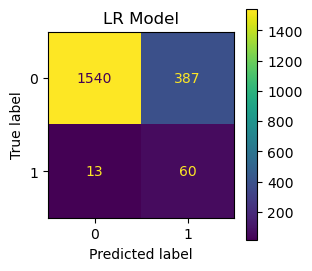

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=model_5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_5.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('LR Model')
disp.plot(ax=ax)

## Decision Tree <a class="anchor" id="dt"></a>


In [269]:


target_names = ["Machine Failure"]


In [270]:
#CONFUSION_MATRIX_STORAGE
CMS = {}
results = {}
#FIT
dt_model01 = DecisionTreeClassifier()
dt_model01.fit(X_train, y_train)

#Predict
dt_model01_prediction = dt_model01.predict(X_test)
CMS["dt_model01"] = confusion_matrix(y_test, dt_model01_prediction)

#validation
dt_model01_cv_recall = cross_val_score(dt_model01, X, y, cv=5, scoring="recall")


In [271]:
#STATS
dt_model01_acc = accuracy_score(y_test, dt_model01_prediction)
dt_model01_rec = recall_score(y_test, dt_model01_prediction)
dt_model01_pre = precision_score(y_test, dt_model01_prediction)
dt_model01_f1s = f1_score(y_test, dt_model01_prediction)
dt_model01_test_probs = dt_model01.predict_proba(X_test)[:, 1]
dt_model01_roc_auc = roc_auc_score(y_test, dt_model01_test_probs)



In [272]:
#RESULTS_DICT
results['dt_model01'] = {
    "acc": dt_model01_acc,
    "rec": dt_model01_rec,
    "pre": dt_model01_pre,
    "f1s": dt_model01_f1s,
    "roc_auc": dt_model01_roc_auc,
    "cv_recall": np.mean(dt_model01_cv_recall)
}
results


{'dt_model01': {'acc': 0.9815,
  'rec': 0.7123287671232876,
  'pre': 0.7647058823529411,
  'f1s': 0.7375886524822695,
  'roc_auc': 0.8520128526846328,
  'cv_recall': 0.6019315188762071}}

In [273]:
#GRID_SEARCH


In [274]:
#PARAM_GRID_01
param_grid_01 = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#DT_MODEL02 - #PARAM_GRID_01
dt_model02 = GridSearchCV(DecisionTreeClassifier(), param_grid_01, refit=True)
dt_model02.fit(X_train, y_train)
dt_model02_prediction = dt_model02.predict(X_test)
CMS["dt_model02"] = confusion_matrix(y_test, dt_model02_prediction)

#DT_MODEL02_STATS
dt_model02_acc = accuracy_score(y_test, dt_model02_prediction)
dt_model02_rec = recall_score(y_test, dt_model02_prediction)
dt_model02_pre = precision_score(y_test, dt_model02_prediction)
dt_model02_f1s = f1_score(y_test, dt_model02_prediction)
dt_model02_test_probs = dt_model02.predict_proba(X_test)[:, 1]
dt_model02_roc_auc = roc_auc_score(y_test, dt_model02_test_probs)

#validation
dt_model02_cv_recall = cross_val_score(dt_model02, X, y, cv=5, scoring="recall")
#ADD TO RESULTS



In [275]:
results['dt_model02'] = {
    "acc": dt_model02_acc,
    "rec": dt_model02_rec,
    "pre": dt_model02_pre,
    "f1s": dt_model02_f1s,
    "roc_auc": dt_model02_roc_auc,
    "cv_recall": np.mean(dt_model02_cv_recall)
}
results

{'dt_model01': {'acc': 0.9815,
  'rec': 0.7123287671232876,
  'pre': 0.7647058823529411,
  'f1s': 0.7375886524822695,
  'roc_auc': 0.8520128526846328,
  'cv_recall': 0.6019315188762071},
 'dt_model02': {'acc': 0.983,
  'rec': 0.6986301369863014,
  'pre': 0.8095238095238095,
  'f1s': 0.7500000000000001,
  'roc_auc': 0.9257238521088212,
  'cv_recall': 0.3960052677787533}}

In [276]:
#DT_MODEL02 - #PARAM_GRID01_BEST
model_name = ""
print("dt_model02 gridsearch cv ")
print(f"BEST ESTIMATOR: \n", dt_model02.best_estimator_)
print(f"BEST PARAMS: \n", dt_model02.best_params_)
print(f"BEST SCORE: \n", dt_model02.best_score_)
print(f"BEST INDEX: \n", dt_model02.best_index_)

dt_model02 gridsearch cv 
BEST ESTIMATOR: 
 DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)
BEST PARAMS: 
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
BEST SCORE: 
 0.98125
BEST INDEX: 
 50


In [277]:
#PARAM_GRID_02_SCORING = RECALL
param_grid_02 = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'criterion': ['entropy', 'gini']
}

#DT_MODEL03 - #PARAM_GRID_02
dt_model03 = GridSearchCV(DecisionTreeClassifier(), param_grid_02, refit=True, scoring='recall')
dt_model03.fit(X_train, y_train)
dt_model03_prediction = dt_model03.predict(X_test)
CMS["dt_model03"] = confusion_matrix(y_test, dt_model03_prediction)

#DT_MODEL03_STATS
dt_model03_acc = accuracy_score(y_test, dt_model03_prediction)
dt_model03_rec = recall_score(y_test, dt_model03_prediction)
dt_model03_pre = precision_score(y_test, dt_model03_prediction)
dt_model03_f1s = f1_score(y_test, dt_model03_prediction)
dt_model03_test_probs = dt_model03.predict_proba(X_test)[:, 1]
dt_model03_roc_auc = roc_auc_score(y_test, dt_model03_test_probs)

#VALIDATION
dt_model03_cv_recall = cross_val_score(dt_model03, X, y, cv=5, scoring="recall")

In [278]:
#ADD TO RESULTS
results['dt_model03'] = {
    "acc": dt_model03_acc,
    "rec": dt_model03_rec,
    "pre": dt_model03_pre,
    "f1s": dt_model03_f1s,
    "roc_auc": dt_model03_roc_auc,
    "cv_recall": np.mean(dt_model03_cv_recall)
}
results

{'dt_model01': {'acc': 0.9815,
  'rec': 0.7123287671232876,
  'pre': 0.7647058823529411,
  'f1s': 0.7375886524822695,
  'roc_auc': 0.8520128526846328,
  'cv_recall': 0.6019315188762071},
 'dt_model02': {'acc': 0.983,
  'rec': 0.6986301369863014,
  'pre': 0.8095238095238095,
  'f1s': 0.7500000000000001,
  'roc_auc': 0.9257238521088212,
  'cv_recall': 0.3960052677787533},
 'dt_model03': {'acc': 0.9835,
  'rec': 0.7534246575342466,
  'pre': 0.7857142857142857,
  'f1s': 0.7692307692307693,
  'roc_auc': 0.8802276233196608,
  'cv_recall': 0.5723002633889377}}

In [279]:
#DT_MODEL03 - #PARAM_GRID02_BEST
print("dt_model03 gridsearch cv ")
print(f"BEST ESTIMATOR: \n", dt_model03.best_estimator_)
print(f"BEST PARAMS: \n", dt_model03.best_params_)
print(f"BEST SCORE: \n", dt_model03.best_score_)
print(f"BEST INDEX: \n", dt_model03.best_index_)

dt_model03 gridsearch cv 
BEST ESTIMATOR: 
 DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=5)
BEST PARAMS: 
 {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
BEST SCORE: 
 0.6541579315164221
BEST INDEX: 
 19


In [280]:
#FEATURE_REMOVAL
X_drop = X.drop('Process temperature [K]', axis=1)
X_drop

X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=101)

#FIT
dt_model04 = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=5, min_samples_leaf=2,
                                    criterion='entropy')
dt_model04.fit(X_train, y_train)
#PREDICTION
dt_model04_prediction = dt_model04.predict(X_test)
CMS["dt_model04"] = confusion_matrix(y_test, dt_model04_prediction)

#VALIDATION
dt_model04_cv_recall = cross_val_score(dt_model04, X, y, cv=5, scoring="recall")

In [281]:
#FEATURE_REMOVAL_STATS
dt_model04_acc = accuracy_score(y_test, dt_model04_prediction)
dt_model04_rec = recall_score(y_test, dt_model04_prediction)
dt_model04_pre = precision_score(y_test, dt_model04_prediction)
dt_model04_f1s = f1_score(y_test, dt_model04_prediction)
dt_model04_test_probs = dt_model04.predict_proba(X_test)[:, 1]
dt_model04_roc_auc = roc_auc_score(y_test, dt_model04_test_probs)



In [282]:
#FEATURE_REMOVAL_RESULTS_DICT
results['dt_model04'] = {
    "acc": dt_model04_acc,
    "rec": dt_model04_rec,
    "pre": dt_model04_pre,
    "f1s": dt_model04_f1s,
    "roc_auc": dt_model04_roc_auc,
    "cv_recall": np.mean(dt_model04_cv_recall)
}
results


{'dt_model01': {'acc': 0.9815,
  'rec': 0.7123287671232876,
  'pre': 0.7647058823529411,
  'f1s': 0.7375886524822695,
  'roc_auc': 0.8520128526846328,
  'cv_recall': 0.6019315188762071},
 'dt_model02': {'acc': 0.983,
  'rec': 0.6986301369863014,
  'pre': 0.8095238095238095,
  'f1s': 0.7500000000000001,
  'roc_auc': 0.9257238521088212,
  'cv_recall': 0.3960052677787533},
 'dt_model03': {'acc': 0.9835,
  'rec': 0.7534246575342466,
  'pre': 0.7857142857142857,
  'f1s': 0.7692307692307693,
  'roc_auc': 0.8802276233196608,
  'cv_recall': 0.5723002633889377},
 'dt_model04': {'acc': 0.9525,
  'rec': 0.7671232876712328,
  'pre': 0.417910447761194,
  'f1s': 0.5410628019323672,
  'roc_auc': 0.8727705070696874,
  'cv_recall': 0.5725636523266023}}

In [283]:
#UNDER_SAMPLING
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df.iloc[:, -1] == 0]
target2 = train_df[train_df.iloc[:, -1] == 1]

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:, -1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]



Class 1 count: 7734, Class 2 count: 266


In [285]:
# Create a Decision Tree classifier
dt_model05 = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=5, min_samples_leaf=2,
                                    criterion='entropy')

# Train the classifier on the undersampled training data (FIT)
dt_model05.fit(X_train_u, y_train_u)

# Make predictions on the test set
dt_model05_prediction = dt_model05.predict(X_test)
CMS["dt_model05"] = confusion_matrix(y_test, dt_model05_prediction)

#VALIDATION
dt_model05_cv_recall = cross_val_score(dt_model05, X, y, cv=5, scoring="recall")

In [286]:
#UNDERSAMPLING_STATS
dt_model05_acc = accuracy_score(y_test, dt_model05_prediction)
dt_model05_rec = recall_score(y_test, dt_model05_prediction)
dt_model05_pre = precision_score(y_test, dt_model05_prediction)
dt_model05_f1s = f1_score(y_test, dt_model05_prediction)
dt_model05_test_probs = dt_model05.predict_proba(X_test)[:, 1]
dt_model05_roc_auc = roc_auc_score(y_test, dt_model05_test_probs)

In [287]:
#ADD TO RESULTS
results['dt_model05'] = {
    "acc": dt_model05_acc,
    "rec": dt_model05_rec,
    "pre": dt_model05_pre,
    "f1s": dt_model05_f1s,
    "roc_auc": dt_model05_roc_auc,
    "cv_recall": np.mean(dt_model05_cv_recall)
}
results

{'dt_model01': {'acc': 0.9815,
  'rec': 0.7123287671232876,
  'pre': 0.7647058823529411,
  'f1s': 0.7375886524822695,
  'roc_auc': 0.8520128526846328,
  'cv_recall': 0.6019315188762071},
 'dt_model02': {'acc': 0.983,
  'rec': 0.6986301369863014,
  'pre': 0.8095238095238095,
  'f1s': 0.7500000000000001,
  'roc_auc': 0.9257238521088212,
  'cv_recall': 0.3960052677787533},
 'dt_model03': {'acc': 0.9835,
  'rec': 0.7534246575342466,
  'pre': 0.7857142857142857,
  'f1s': 0.7692307692307693,
  'roc_auc': 0.8802276233196608,
  'cv_recall': 0.5723002633889377},
 'dt_model04': {'acc': 0.9525,
  'rec': 0.7671232876712328,
  'pre': 0.417910447761194,
  'f1s': 0.5410628019323672,
  'roc_auc': 0.8727705070696874,
  'cv_recall': 0.5725636523266023},
 'dt_model05': {'acc': 0.8875,
  'rec': 0.8493150684931506,
  'pre': 0.2246376811594203,
  'f1s': 0.3553008595988538,
  'roc_auc': 0.8803413638916336,
  'cv_recall': 0.5755487269534679}}

In [288]:
# Random Over_Sampling

In [289]:
train_df = pd.concat([X_train, y_train], axis=1)
target1 = train_df[train_df.iloc[:, -1] == 0]
target2 = train_df[train_df.iloc[:, -1] == 1]

target1_count, target2_count = train_df.iloc[:, -1].value_counts()

# Oversaampling class 1
target2_o = target2.sample(target1_count, replace=True)
train_df_o = pd.concat([target1, target2_o], axis=0)

In [290]:
train_df_o.shape

(15468, 8)

In [291]:
X_train_o = train_df_o.drop(['Machine failure'], axis=1)
y_train_o = train_df_o[['Machine failure']]

In [292]:
y_train_o.shape

(15468, 1)

In [294]:
# Create a Decision Tree classifier
dt_model06 = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=5, min_samples_leaf=2,
                                    criterion='entropy')

In [295]:
# Create a Decision Tree classifier
dt_model06.fit(X_train_o, y_train_o)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [296]:
# Make predictions on the test set
dt_model06_prediction = dt_model06.predict(X_test)
CMS["dt_model06"] = confusion_matrix(y_test, dt_model06_prediction)

#VALIDATION
dt_model06_cv_recall = cross_val_score(dt_model06, X, y, cv=5, scoring="recall")

In [297]:
#OVERRSAMPLING_STATS
dt_model06_acc = accuracy_score(y_test, dt_model06_prediction)
dt_model06_rec = recall_score(y_test, dt_model06_prediction)
dt_model06_pre = precision_score(y_test, dt_model06_prediction)
dt_model06_f1s = f1_score(y_test, dt_model06_prediction)
dt_model06_test_probs = dt_model06.predict_proba(X_test)[:, 1]
dt_model06_roc_auc = roc_auc_score(y_test, dt_model06_test_probs)

In [298]:
#ADD TO RESULTS
results['dt_model06'] = {
    "acc": dt_model06_acc,
    "rec": dt_model06_rec,
    "pre": dt_model06_pre,
    "f1s": dt_model06_f1s,
    "roc_auc": dt_model06_roc_auc,
    "cv_recall": np.mean(dt_model05_cv_recall)
}
results

{'dt_model01': {'acc': 0.9815,
  'rec': 0.7123287671232876,
  'pre': 0.7647058823529411,
  'f1s': 0.7375886524822695,
  'roc_auc': 0.8520128526846328,
  'cv_recall': 0.6019315188762071},
 'dt_model02': {'acc': 0.983,
  'rec': 0.6986301369863014,
  'pre': 0.8095238095238095,
  'f1s': 0.7500000000000001,
  'roc_auc': 0.9257238521088212,
  'cv_recall': 0.3960052677787533},
 'dt_model03': {'acc': 0.9835,
  'rec': 0.7534246575342466,
  'pre': 0.7857142857142857,
  'f1s': 0.7692307692307693,
  'roc_auc': 0.8802276233196608,
  'cv_recall': 0.5723002633889377},
 'dt_model04': {'acc': 0.9525,
  'rec': 0.7671232876712328,
  'pre': 0.417910447761194,
  'f1s': 0.5410628019323672,
  'roc_auc': 0.8727705070696874,
  'cv_recall': 0.5725636523266023},
 'dt_model05': {'acc': 0.8875,
  'rec': 0.8493150684931506,
  'pre': 0.2246376811594203,
  'f1s': 0.3553008595988538,
  'roc_auc': 0.8803413638916336,
  'cv_recall': 0.5755487269534679},
 'dt_model06': {'acc': 0.9575,
  'rec': 0.7534246575342466,
  'pre'

In [254]:
#PRINT RESULTS
for model, metrics in results.items():
    print(f"Model:{model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("-------------")

Model:dt_model01
acc: 0.979
rec: 0.6986301369863014
pre: 0.7183098591549296
f1s: 0.7083333333333335
roc_auc: 0.8441256548968872
cv_recall: 0.6079894644424935
-------------
Model:dt_model02
acc: 0.9835
rec: 0.726027397260274
pre: 0.803030303030303
f1s: 0.7625899280575539
roc_auc: 0.8976974642961236
cv_recall: 0.3989464442493415
-------------
Model:dt_model03
acc: 0.9815
rec: 0.7397260273972602
pre: 0.75
f1s: 0.7448275862068966
roc_auc: 0.8790511192783161
cv_recall: 0.5633450395083407
-------------
Model:dt_model04
acc: 0.9555
rec: 0.7671232876712328
pre: 0.4375
f1s: 0.5572139303482587
roc_auc: 0.8739612286825287
cv_recall: 0.5902546093064092
-------------
Model:dt_model05
acc: 0.8915
rec: 0.863013698630137
pre: 0.23333333333333334
f1s: 0.3673469387755102
roc_auc: 0.883017821725871
cv_recall: 0.5457857769973662
-------------
Model:dt_model06
acc: 0.962
rec: 0.7671232876712328
pre: 0.48695652173913045
f1s: 0.5957446808510638
roc_auc: 0.8744232997561686
cv_recall: 0.5457857769973662
------

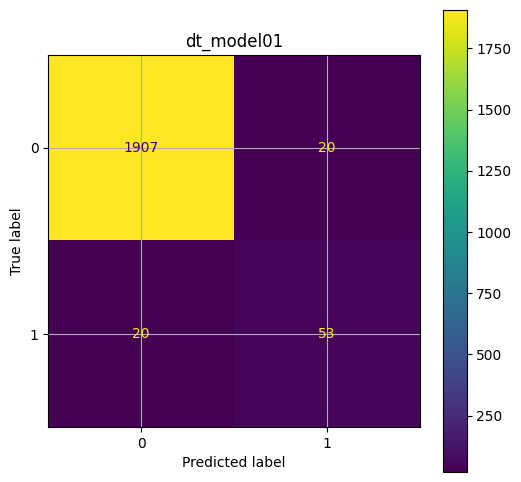

In [202]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model01'], display_labels=dt_model01.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model01')
plt.grid(None)
disp.plot(ax=ax)

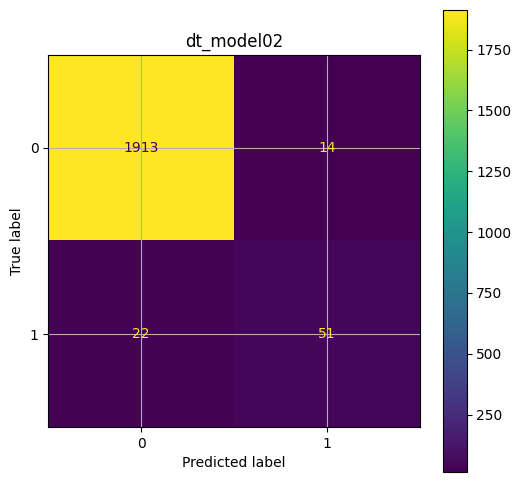

In [203]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model02'], display_labels=dt_model02.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model02')
plt.grid(None)
disp.plot(ax=ax)

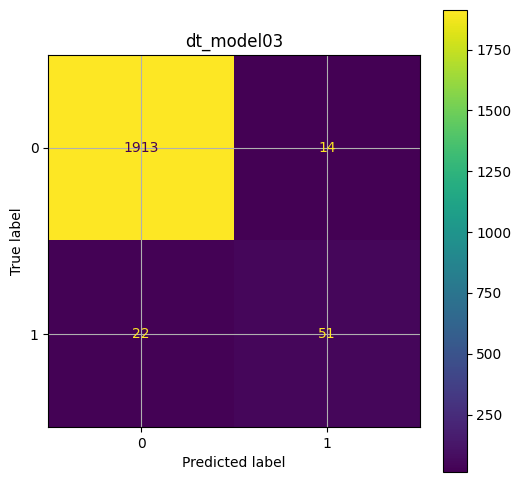

In [204]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model03'], display_labels=dt_model03.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model03')
plt.grid(None)
disp.plot(ax=ax)

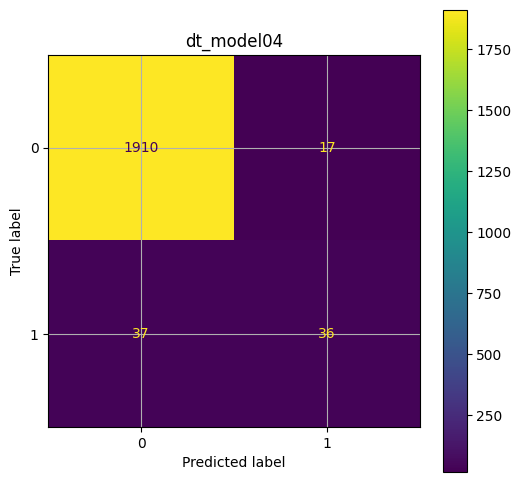

In [205]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model04'], display_labels=dt_model04.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model04')
plt.grid(None)
disp.plot(ax=ax)

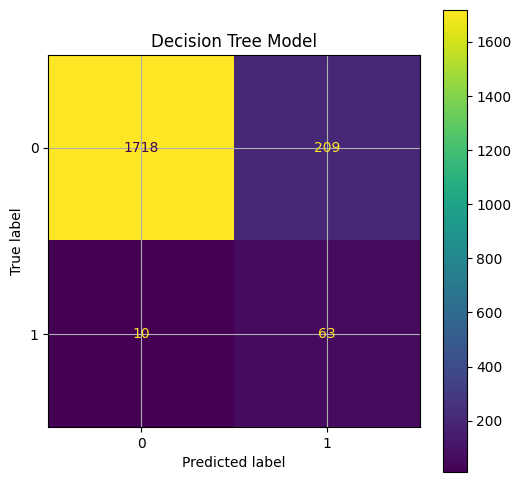

In [206]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model05'], display_labels=dt_model05.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Decision Tree Model')
plt.grid(None)
disp.plot(ax=ax)

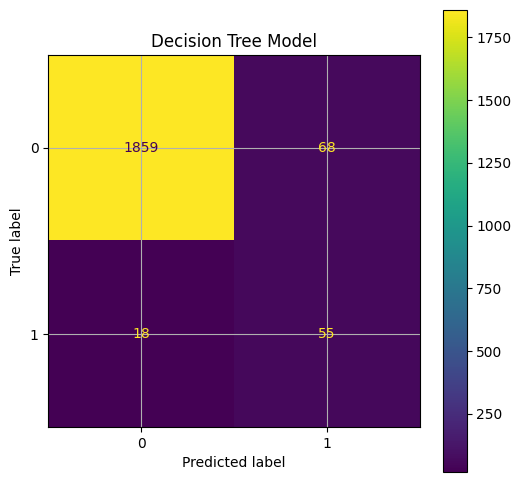

In [207]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model06'], display_labels=dt_model06.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Decision Tree Model')
plt.grid(None)
disp.plot(ax=ax)

## Random Forest <a class="anchor" id="rf"></a>

In [15]:
target_names = ["Machine Failure"]

In [51]:
#CONFUSION_MATRIX_STORAGE
CMS = {}
results = {}
#FIT
rf_model01 = RandomForestClassifier(n_estimators=50)
rf_model01.fit(X_train, y_train)

#Predict
rf_model01_prediction = rf_model01.predict(X_test)
CMS["rf_model01"] = confusion_matrix(y_test, rf_model01_prediction)

#VALIDATION
rf_model02_cv_recall = cross_val_score(rf_model01, X, y, cv=5, scoring="recall")



C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [52]:
#STATS
rf_model01_acc = accuracy_score(y_test, rf_model01_prediction)
rf_model01_rec = recall_score(y_test, rf_model01_prediction, average='weighted')
rf_model01_pre = precision_score(y_test, rf_model01_prediction, average='weighted')
rf_model01_f1s = f1_score(y_test, rf_model01_prediction)
rf_model01_test_probs = rf_model01.predict_proba(X_test)[:, 1]
rf_model01_roc_auc = roc_auc_score(y_test, rf_model01_test_probs)


In [53]:
#RESULTS
results['rf_model01'] = {
    "acc": rf_model01_acc,
    "rec": rf_model01_rec,
    "pre": rf_model01_pre,
    "f1s": rf_model01_f1s,
    "roc_auc": rf_model01_roc_auc,
    "cv_recall": np.mean(rf_model02_cv_recall)
}
results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162}}

In [54]:
#GRID_SEARCH


In [55]:
#PARAM_GRID_01
param_grid_01 = {
    'n_estimators': [32, 64, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_jobs': [10]
}

#RF_MODEL02 - #PARAM_GRID_01
rf_model02 = GridSearchCV(RandomForestClassifier(), param_grid_01, refit=True)
rf_model02.fit(X_train, y_train)
rf_model02_prediction = rf_model02.predict(X_test)
CMS["rf_model02"] = confusion_matrix(y_test, rf_model02_prediction)

#VALIDATION
rf_model02_cv_recall = cross_val_score(rf_model02, X, y, cv=5, scoring="recall")



C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [56]:
#RF_MODEL02_STATS
rf_model02_acc = accuracy_score(y_test, rf_model02_prediction)
rf_model02_rec = recall_score(y_test, rf_model02_prediction, average='weighted')
rf_model02_pre = precision_score(y_test, rf_model02_prediction, average='weighted')
rf_model02_f1s = f1_score(y_test, rf_model02_prediction)
rf_model02_test_probs = rf_model02.predict_proba(X_test)[:, 1]
rf_model02_roc_auc = roc_auc_score(y_test, rf_model02_test_probs)

#ADD TO RESULTS
results['rf_model02'] = {
    "acc": rf_model02_acc,
    "rec": rf_model02_rec,
    "pre": rf_model02_pre,
    "f1s": rf_model02_f1s,
    "roc_auc": rf_model02_roc_auc,
    "cv_recall": np.mean(rf_model02_cv_recall)
}
results


{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877}}

In [57]:
#RF_MODEL02 - #PARAM_GRID01_BEST
model_name = ""
print("rf_model02 gridsearch cv ")
print(f"BEST ESTIMATOR: \n", rf_model02.best_estimator_)
print(f"BEST PARAMS: \n", rf_model02.best_params_)
print(f"BEST SCORE: \n", rf_model02.best_score_)
print(f"BEST INDEX: \n", rf_model02.best_index_)

rf_model02 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(n_estimators=500, n_jobs=10)
BEST PARAMS: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': 10}
BEST SCORE: 
 0.98125
BEST INDEX: 
 2


In [58]:
#PARAM_GRID_02
param_grid_02 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#RF_MODEL03 - #PARAM_GRID_02
rf_model03 = GridSearchCV(RandomForestClassifier(), param_grid_01, refit=True, scoring='recall')
rf_model03.fit(X_train, y_train)
rf_model03_prediction = rf_model03.predict(X_test)
CMS["rf_model03"] = confusion_matrix(y_test, rf_model03_prediction)

#RF_MODEL03_STATS
rf_model03_acc = accuracy_score(y_test, rf_model03_prediction)
rf_model03_rec = recall_score(y_test, rf_model03_prediction)
rf_model03_pre = precision_score(y_test, rf_model03_prediction)
rf_model03_f1s = f1_score(y_test, rf_model03_prediction)
rf_model03_test_probs = rf_model03.predict_proba(X_test)[:, 1]
rf_model03_roc_auc = roc_auc_score(y_test, rf_model03_test_probs)

#VALIDATION
rf_model03_cv_recall = cross_val_score(rf_model03, X, y, cv=5, scoring="recall")




C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [59]:
#ADD TO RESULTS
results['rf_model03'] = {
    "acc": rf_model03_acc,
    "rec": rf_model03_rec,
    "pre": rf_model03_pre,
    "f1s": rf_model03_f1s,
    "roc_auc": rf_model03_roc_auc,
    "cv_recall": np.mean(rf_model03_cv_recall)
}


In [60]:
#RF_MODEL03 - #PARAM_GRID02_BEST
print("rf_model03 gridsearch cv ")
print(f"BEST ESTIMATOR: \n", rf_model03.best_estimator_)
print(f"BEST PARAMS: \n", rf_model03.best_params_)
print(f"BEST SCORE: \n", rf_model03.best_score_)
print(f"BEST INDEX: \n", rf_model03.best_index_)

rf_model03 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(n_estimators=500, n_jobs=10)
BEST PARAMS: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': 10}
BEST SCORE: 
 0.503843466107617
BEST INDEX: 
 2


In [61]:
#FEATURE_REMOVAL
X_drop = X.drop('Process temperature [K]', axis=1)
X_drop

X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=101)

#FIT
rf_model04 = RandomForestClassifier(n_estimators=50)
rf_model04.fit(X_train, y_train)
#PREDICTION
rf_model04_prediction = rf_model04.predict(X_test)
CMS["rf_model04"] = confusion_matrix(y_test, rf_model04_prediction)

#VALIDATION
rf_model04_cv_recall = cross_val_score(rf_model04, X, y, cv=5, scoring="recall")

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [62]:
#FEATURE_REMOVAL_STATS
rf_model04_acc = accuracy_score(y_test, rf_model04_prediction)
rf_model04_rec = recall_score(y_test, rf_model04_prediction, average='weighted')
rf_model04_pre = precision_score(y_test, rf_model04_prediction, average='weighted')
rf_model04_f1s = f1_score(y_test, rf_model04_prediction)
rf_model04_test_probs = rf_model04.predict_proba(X_test)[:, 1]
rf_model04_roc_auc = roc_auc_score(y_test, rf_model04_test_probs)


In [63]:
#FEATURE_REMOVAL_RESULTS_DICT
results['rf_model04'] = {
    "acc": rf_model04_acc,
    "rec": rf_model04_rec,
    "pre": rf_model04_pre,
    "f1s": rf_model04_f1s,
    "roc_auc": rf_model04_roc_auc,
    "cv_recall": np.mean(rf_model04_cv_recall)
}
results


{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053}}

In [64]:
#UnderSampling
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df['Machine failure'] == 0]
target2 = train_df[train_df['Machine failure'] == 1]

'''target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]'''

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:, -1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]
print(type(y_train_u))

Class 1 count: 7734, Class 2 count: 266
<class 'pandas.core.frame.DataFrame'>


In [65]:
# Create a Random Forest classifier
rf_model05 = RandomForestClassifier(n_estimators=50)

# Train the classifier on the undersampled training data
rf_model05.fit(X_train_u, y_train_u.values.ravel())

# Make predictions on the test set
rf_model05_prediction = rf_model05.predict(X_test)
CMS["rf_model05"] = confusion_matrix(y_test, rf_model05_prediction)

#VALIDATION
rf_model05_cv_recall = cross_val_score(rf_model05, X, y, cv=5, scoring="recall")

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [66]:
# Model05 Evaluation Metrics
rf_model05_acc = accuracy_score(y_test, rf_model05_prediction)
rf_model05_rec = recall_score(y_test, rf_model05_prediction, average='weighted')
rf_model05_pre = precision_score(y_test, rf_model05_prediction, average='weighted')
rf_model05_f1s = f1_score(y_test, rf_model05_prediction)
rf_model05_test_probs = rf_model05.predict_proba(X_test)[:, 1]
rf_model05_roc_auc = roc_auc_score(y_test, rf_model05_test_probs)

In [67]:
#Print the Evaluation Metrics for the Undersampled Model05
results['rf_model05'] = {
    "acc": rf_model05_acc,
    "rec": rf_model05_rec,
    "pre": rf_model05_pre,
    "f1s": rf_model05_f1s,
    "roc_auc": rf_model05_roc_auc,
    "cv_recall": np.mean(rf_model05_cv_recall)
}

results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132}}

In [68]:
#UnderSampling + gridsearchCV
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df['Machine failure'] == 0]
target2 = train_df[train_df['Machine failure'] == 1]

'''target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]'''

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:, -1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]
print(type(y_train_u))

#PARAM_GRID_03
param_grid_03 = {
    'n_estimators': [64, 128, 256],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 3],
}

#RF_MODEL06 - #PARAM_GRID_03
rf_model06 = GridSearchCV(RandomForestClassifier(), param_grid_03, refit=True, scoring='recall')
rf_model06.fit(X_train_u, y_train_u.values.ravel())
rf_model06_prediction = rf_model06.predict(X_test)

#VALIDATION
rf_model06_cv_recall = cross_val_score(rf_model06, X, y, cv=5, scoring="recall")


Class 1 count: 7734, Class 2 count: 266
<class 'pandas.core.frame.DataFrame'>


C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [69]:
CMS["rf_model06"] = confusion_matrix(y_test, rf_model06_prediction)


In [70]:
#DT_MODEL06 - #PARAM_GRID03_BEST
print("dt_model06 gridsearch cv - undersample ")
print(f"BEST ESTIMATOR: \n", rf_model06.best_estimator_)
print(f"BEST PARAMS: \n", rf_model06.best_params_)
print(f"BEST SCORE: \n", rf_model06.best_score_)
print(f"BEST INDEX: \n", rf_model06.best_index_)

dt_model06 gridsearch cv - undersample 
BEST ESTIMATOR: 
 RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=128)
BEST PARAMS: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 128}
BEST SCORE: 
 0.9622641509433961
BEST INDEX: 
 13


In [71]:
rf_model06_acc = accuracy_score(y_test, rf_model06_prediction)
rf_model06_rec = recall_score(y_test, rf_model06_prediction)
rf_model06_pre = precision_score(y_test, rf_model06_prediction)
rf_model06_f1s = f1_score(y_test, rf_model06_prediction)
rf_model06_test_probs = rf_model06.predict_proba(X_test)[:, 1]
rf_model06_roc_auc = roc_auc_score(y_test, rf_model06_test_probs)

results['rf_model06'] = {
    "acc": rf_model06_acc,
    "rec": rf_model06_rec,
    "pre": rf_model06_pre,
    "f1s": rf_model06_f1s,
    "roc_auc": rf_model06_roc_auc,
    "cv_recall": np.mean(rf_model06_cv_recall)
}

results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132},
 'rf_model06': {'acc': 0.884,
  'rec': 0.9315068493150684,
  'pre': 0.2305084745762712,
  'f1s': 0.36956521739130

In [72]:
#UnderSampling + gridsearchCV


#PARAM_GRID_03
param_grid_04 = {
    'n_estimators': [256],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ["gini", "entropy"],
    "min_impurity_decrease": [0.0, 0.5, 1],
    "n_jobs": [8],

}

#RF_MODEL07 - #PARAM_GRID_03
rf_model07 = GridSearchCV(RandomForestClassifier(), param_grid_04, refit=True, scoring='recall')
rf_model07.fit(X_train, y_train.values.ravel())
rf_model07_prediction = rf_model07.predict(X_test)
CMS["rf_model07"] = confusion_matrix(y_test, rf_model07_prediction)

#VALIDATION
rf_model07_cv_recall = cross_val_score(rf_model07, X, y, cv=5, scoring="recall")

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [94]:

#RF_MODEL07_STATS
rf_model07_acc = accuracy_score(y_test, rf_model07_prediction)
rf_model07_rec = recall_score(y_test, rf_model07_prediction)
rf_model07_pre = precision_score(y_test, rf_model07_prediction)
rf_model07_f1s = f1_score(y_test, rf_model07_prediction)
rf_model07_test_probs = rf_model07.predict_proba(X_test)[:, 1]
rf_model07_roc_auc = roc_auc_score(y_test, rf_model07_test_probs)
results


{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132},
 'rf_model06': {'acc': 0.884,
  'rec': 0.9315068493150684,
  'pre': 0.2305084745762712,
  'f1s': 0.36956521739130

In [74]:
CMS["rf_model07"] = confusion_matrix(y_test, rf_model07_prediction)

In [75]:
print(classification_report(rf_model07_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1972
           1       0.34      0.89      0.50        28

    accuracy                           0.97      2000
   macro avg       0.67      0.93      0.74      2000
weighted avg       0.99      0.97      0.98      2000


In [76]:
print(classification_report(rf_model06_prediction, y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1705
           1       0.93      0.23      0.37       295

    accuracy                           0.88      2000
   macro avg       0.91      0.61      0.65      2000
weighted avg       0.89      0.88      0.85      2000


In [77]:
print(classification_report(rf_model05_prediction, y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1722
           1       0.92      0.24      0.38       278

    accuracy                           0.89      2000
   macro avg       0.90      0.62      0.66      2000
weighted avg       0.89      0.89      0.86      2000


In [78]:
print(classification_report(rf_model04_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1965
           1       0.41      0.86      0.56        35

    accuracy                           0.98      2000
   macro avg       0.70      0.92      0.77      2000
weighted avg       0.99      0.98      0.98      2000


In [79]:
print(classification_report(rf_model03_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1964
           1       0.48      0.97      0.64        36

    accuracy                           0.98      2000
   macro avg       0.74      0.98      0.82      2000
weighted avg       0.99      0.98      0.98      2000


In [80]:
print(classification_report(rf_model02_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1962
           1       0.49      0.95      0.65        38

    accuracy                           0.98      2000
   macro avg       0.75      0.96      0.82      2000
weighted avg       0.99      0.98      0.98      2000


In [81]:
print(classification_report(rf_model01_prediction, y_test))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1964
           1       0.48      0.97      0.64        36

    accuracy                           0.98      2000
   macro avg       0.74      0.98      0.82      2000
weighted avg       0.99      0.98      0.98      2000


In [95]:
results['rf_model07'] = {
    "acc": rf_model07_acc,
    "rec": rf_model07_rec,
    "pre": rf_model07_pre,
    "f1s": rf_model07_f1s,
    "roc_auc": rf_model07_roc_auc,
    "cv_recall": np.mean(rf_model07_cv_recall)
}
results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132},
 'rf_model06': {'acc': 0.884,
  'rec': 0.9315068493150684,
  'pre': 0.2305084745762712,
  'f1s': 0.36956521739130

In [83]:
#RF_MODEL07 - #PARAM_GRID02_BEST
print("rf_model07 gridsearch cv ")
print(f"BEST ESTIMATOR: \n", rf_model07.best_estimator_)
print(f"BEST PARAMS: \n", rf_model07.best_params_)
print(f"BEST SCORE: \n", rf_model07.best_score_)
print(f"BEST INDEX: \n", rf_model07.best_index_)

rf_model07 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=256,
                       n_jobs=8)
BEST PARAMS: 
 {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'n_estimators': 256, 'n_jobs': 8}
BEST SCORE: 
 0.39489867225716285
BEST INDEX: 
 45


In [17]:
#random over 

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_ros, y_ros, test_size=0.2, random_state=101)
rf_model08 = RandomForestClassifier(n_estimators=256, n_jobs=-1)
rf_model08.fit(X_train_r, y_train_r)
rf_model08_prediction = rf_model08.predict(X_test_r)


C:\Users\Rober\AppData\Local\Temp\ipykernel_12616\2682616712.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model08.fit(X_train_r, y_train_r)


In [84]:

#PRINT RESULTS
for model, metrics in results.items():
    print(f"Model:{model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("-------------")

Model:rf_model01
acc: 0.9805
rec: 0.9805
pre: 0.9803440540846345
f1s: 0.6422018348623852
roc_auc: 0.9565653190778484
cv_recall: 0.4336259877085162
-------------
Model:rf_model02
acc: 0.9805
rec: 0.9805
pre: 0.9799089677557808
f1s: 0.6486486486486486
roc_auc: 0.946581029494352
cv_recall: 0.38358208955223877
-------------
Model:rf_model03
acc: 0.9805
rec: 0.4794520547945205
pre: 0.9722222222222222
f1s: 0.6422018348623852
roc_auc: 0.9513225895884724
cv_recall: 0.40131694468832313
-------------
Model:rf_model04
acc: 0.976
rec: 0.976
pre: 0.9737014903671393
f1s: 0.5555555555555556
roc_auc: 0.9301632888086386
cv_recall: 0.43064091308165053
-------------
Model:rf_model05
acc: 0.8915
rec: 0.8915
pre: 0.9689396197327853
f1s: 0.3817663817663818
roc_auc: 0.9350967861179631
cv_recall: 0.4425812115891132
-------------
Model:rf_model06
acc: 0.884
rec: 0.9315068493150684
pre: 0.2305084745762712
f1s: 0.3695652173913044
roc_auc: 0.9333266984666349
cv_recall: 0.39530289727831425
-------------
Model:rf_m

In [29]:

#RF_MODEL08_STATS
rf_model08_acc = accuracy_score(y_test_r, rf_model08_prediction)
rf_model08_rec = recall_score(y_test_r, rf_model08_prediction)
rf_model08_pre = precision_score(y_test_r, rf_model08_prediction)
rf_model08_f1s = f1_score(y_test_r, rf_model08_prediction)
rf_model08_test_probs = rf_model08.predict_proba(X_test_r)[:, 1]
rf_model08_roc_auc = roc_auc_score(y_test_r, rf_model08_test_probs)
results = {}
CMS = {}
results['rf_model08'] = {
    "acc": rf_model08_acc,
    "rec": rf_model08_rec,
    "pre": rf_model08_pre,
    "f1s": rf_model08_f1s,
    "roc_auc": rf_model08_roc_auc
}
CMS["rf_model08"] = confusion_matrix(y_test_r, rf_model08_prediction)

results


{'rf_model08': {'acc': 0.9958602846054334,
  'rec': 1.0,
  'pre': 0.9918074756784434,
  'f1s': 0.9958868894601542,
  'roc_auc': 1.0}}

In [34]:

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2,
                                                                            random_state=101)
rf_model09 = RandomForestClassifier(n_estimators=256, n_jobs=-1)
rf_model09.fit(X_train_smote, y_train_smote)
rf_model09_prediction = rf_model09.predict(X_test_smote)

C:\Users\Rober\AppData\Local\Temp\ipykernel_12616\3338084772.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model09.fit(X_train_smote, y_train_smote)


In [35]:
#RF_MODEL09_STATS
rf_model09_acc = accuracy_score(y_test_r, rf_model09_prediction)
rf_model09_rec = recall_score(y_test_r, rf_model09_prediction)
rf_model09_pre = precision_score(y_test_r, rf_model09_prediction)
rf_model09_f1s = f1_score(y_test_r, rf_model09_prediction)
rf_model09_test_probs = rf_model09.predict_proba(X_test_r)[:, 1]
rf_model09_roc_auc = roc_auc_score(y_test_r, rf_model09_test_probs)
results = {}
CMS = {}
results['rf_model09'] = {
    "acc": rf_model09_acc,
    "rec": rf_model09_rec,
    "pre": rf_model09_pre,
    "f1s": rf_model09_f1s,
    "roc_auc": rf_model09_roc_auc
}
CMS["rf_model09"] = confusion_matrix(y_test_r, rf_model09_prediction)

results

{'rf_model09': {'acc': 0.9764553686934023,
  'rec': 0.9845121321631388,
  'pre': 0.9690040650406504,
  'f1s': 0.9766965428937259,
  'roc_auc': 0.9993805120636138}}

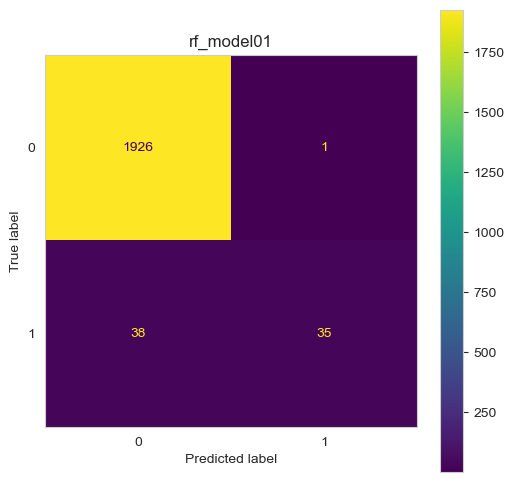

In [85]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model01'], display_labels=rf_model01.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model01')
plt.grid(None)
disp.plot(ax=ax)

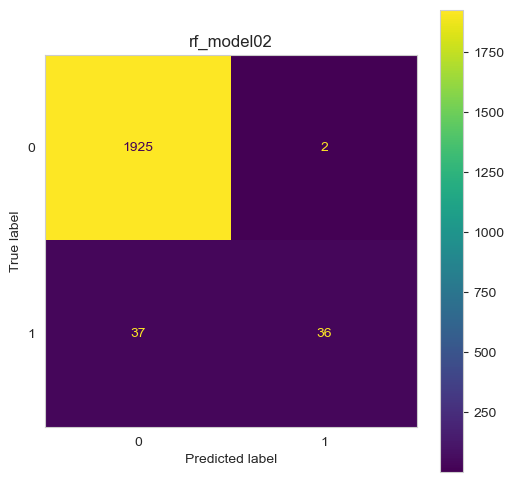

In [86]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model02'], display_labels=rf_model02.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model02')
plt.grid(None)
disp.plot(ax=ax)

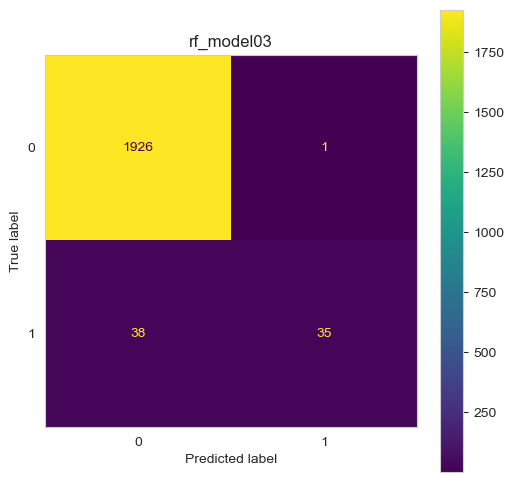

In [87]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model03'], display_labels=rf_model03.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model03')
plt.grid(None)
disp.plot(ax=ax)

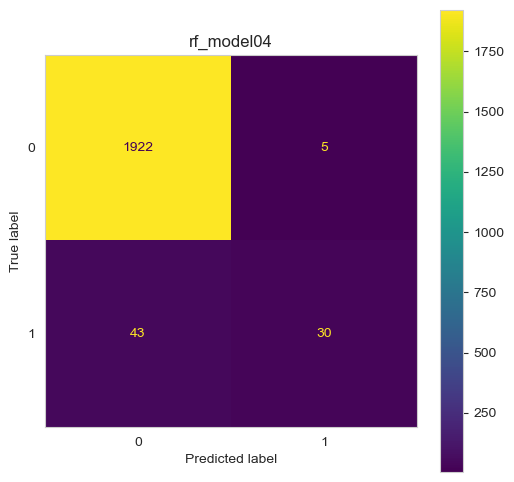

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model04'], display_labels=rf_model04.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model04')
plt.grid(None)
disp.plot(ax=ax)

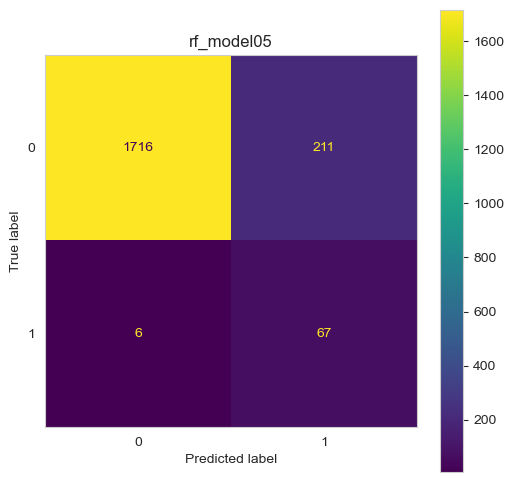

In [89]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model05'], display_labels=rf_model05.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model05')
plt.grid(None)
disp.plot(ax=ax)

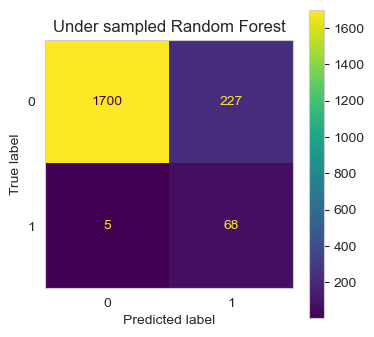

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model06'], display_labels=rf_model06.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Under sampled Random Forest')
plt.grid(None)
disp.plot(ax=ax)

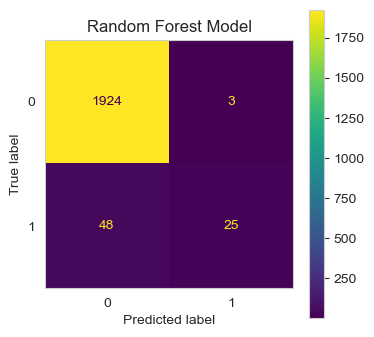

In [91]:

disp.plot(ax=ax)
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model07'], display_labels=rf_model07.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Random Forest Model')
plt.grid(None)
disp.plot(ax=ax)

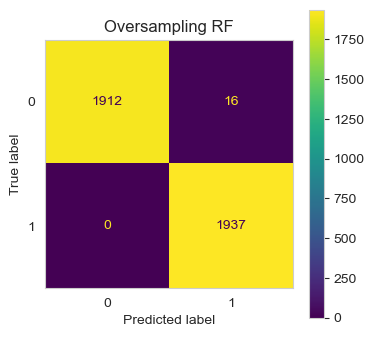

In [32]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model08'], display_labels=rf_model08.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Oversampling RF')
plt.grid(None)
disp.plot(ax=ax)


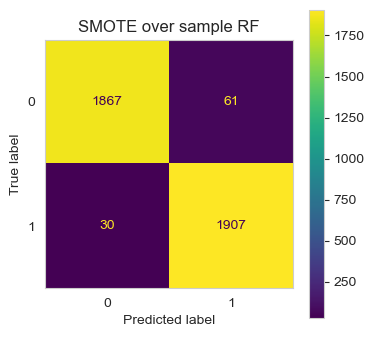

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model09'], display_labels=rf_model09.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('SMOTE over sample RF')
plt.grid(None)
disp.plot(ax=ax)


## Stochastic Gradient Descent <a class="sgd" id="logreg"></a>


In [129]:
SGD_model_1 = SGDClassifier()

In [131]:
SGD_model_1.fit(X_train, y_train)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [132]:
SGD_predictions_1 = SGD_model_1.predict(X_test)

In [422]:


print(confusion_matrix(y_test, SGD_predictions_1))

[[1927    0]
 [  70    3]]


In [135]:
acc = accuracy_score(y_test, SGD_predictions_1)
rec = recall_score(y_test, SGD_predictions_1)
pre = precision_score(y_test, SGD_predictions_1)
f1s = f1_score(y_test, SGD_predictions_1)
print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)



Accuracy:  0.965
Recall:  0.0410958904109589
Precision:  1.0
F1 Score:  0.07894736842105263


### Grid Search

In [157]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'class_weight': ['balanced'],
    'random_state': [101]
}
# alpha=0.001, penalty='l2', max_iter=1000, tol=1e-3, class_weight='balanced', random_state=101

In [158]:
SGD_grid = GridSearchCV(SGDClassifier(), param_grid, refit=True)

In [159]:
%%capture
SGD_grid.fit(X_train, y_train)

In [160]:
SGD_predictions_2 = SGD_grid.predict(X_test)

In [424]:
cm2 = confusion_matrix(y_test, SGD_predictions_2)
print(cm2)

[[1589  338]
 [  14   59]]


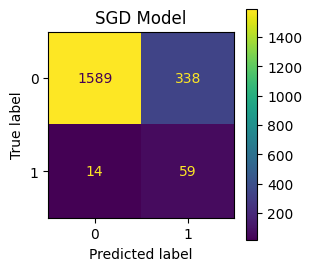

In [425]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=SGD_grid.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('SGD Model')  #can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [176]:
acc2 = accuracy_score(y_test, SGD_predictions_2)
rec2 = recall_score(y_test, SGD_predictions_2)
pre2 = precision_score(y_test, SGD_predictions_2)
f1s2 = f1_score(y_test, SGD_predictions_2)
print("Accuracy: ", acc2)
print("Recall: ", rec2)
print("Precision: ", pre2)
print("F1 Score: ", f1s2)

Accuracy:  0.824
Recall:  0.8082191780821918
Precision:  0.1486146095717884
F1 Score:  0.251063829787234


In [163]:
SGD_grid.best_params_

{'alpha': 0.001,
 'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l1',
 'random_state': 101,
 'tol': 0.1}

In [165]:
SGD_grid.best_estimator_

SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

### Undersampling

In [166]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.head(5)

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
6861,1.0,0.0,0.0,0.630435,0.691358,0.604773,0.175824,0.169960,0
9881,0.0,1.0,0.0,0.380435,0.506173,0.189173,0.476648,0.521739,0
4536,0.0,1.0,0.0,0.771739,0.555556,0.106519,0.567308,0.664032,1
8430,0.0,1.0,0.0,0.391304,0.555556,0.079162,0.733516,0.723320,0
6765,0.0,1.0,0.0,0.673913,0.641975,0.239814,0.391484,0.043478,0


In [167]:
target1 = train_df[train_df.iloc[:, -1] == 0]
target2 = train_df[train_df.iloc[:, -1] == 1]

In [168]:
target1_count, target2_count = train_df.iloc[:, -1].value_counts()
print(target1_count, target2_count)

7734 266


In [169]:
# Undersampling class 0
target1_u = target1.sample(target2_count)
train_df_u = pd.concat([target1_u, target2], axis=0)

In [170]:
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]

In [171]:
SGD_model_3 = SGDClassifier(alpha=0.001, class_weight='balanced', max_iter=1000, penalty='l1',
                            random_state=101, tol=0.1)

In [172]:
SGD_model_3.fit(X_train_u, y_train_u)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

In [173]:
SGD_predictions_u = SGD_model_3.predict(X_test)

In [174]:
print(confusion_matrix(y_test, SGD_predictions_u))

[[1440  487]
 [  14   59]]


In [175]:
acc3 = accuracy_score(y_test, SGD_predictions_u)
rec3 = recall_score(y_test, SGD_predictions_u)
pre3 = precision_score(y_test, SGD_predictions_u)
f1s3 = f1_score(y_test, SGD_predictions_u)
print("Accuracy: ", acc3)
print("Recall: ", rec3)
print("Precision: ", pre3)
print("F1 Score: ", f1s3)

Accuracy:  0.7495
Recall:  0.8082191780821918
Precision:  0.10805860805860806
F1 Score:  0.19063004846526657


In [179]:
%%capture

accuracy_scores = []
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=101)
SGD_model_cv = SGDClassifier(alpha=0.001, max_iter=1000, tol=0.1, penalty="l1",
                             class_weight='balanced', random_state=101)
scores = []
for i in range(5):
    splitted = next(cv.split(X), None)
    X_train_cv = X.iloc[splitted[0]]
    X_test_cv = X.iloc[splitted[1]]
    y_train_cv = y.iloc[splitted[0]]
    y_test_cv = y.iloc[splitted[1]]
    SGD_model_cv.fit(X_train_cv, y_train_cv)
    y_prediction_cv = SGD_model_cv.predict(X_test_cv)
    scores.append(SGD_model_cv.score(X_test_cv, y_test_cv))

In [180]:
conf_cv = confusion_matrix(y_test_cv, y_prediction_cv)
print("Confusion Matrix: \n", conf_cv)

Confusion Matrix: 
 [[1512  415]
 [  13   60]]


In [183]:
acc4 = accuracy_score(y_test, y_prediction_cv)
rec4 = recall_score(y_test, y_prediction_cv)
pre4 = precision_score(y_test, y_prediction_cv)
f1s4 = f1_score(y_test, y_prediction_cv)
print("Accuracy: ", acc4)
print("Recall: ", rec4)
print("Precision: ", pre4)
print("F1 Score: ", f1s4)

Accuracy:  0.744
Recall:  0.2465753424657534
Precision:  0.037894736842105266
F1 Score:  0.06569343065693431


## Oversampling

In [202]:
%%capture

train_df = pd.concat([X_train, y_train], axis=1)
target1 = train_df[train_df.iloc[:, -1] == 0]
target2 = train_df[train_df.iloc[:, -1] == 1]

target1_count, target2_count = train_df.iloc[:, -1].value_counts()

# Oversaampling class 1
target2_o = target2.sample(target1_count, replace=True)
train_df_o = pd.concat([target1, target2_o], axis=0)

In [203]:
train_df_o.shape

(15468, 9)

In [204]:
X_train_o = train_df_o.drop(['Machine failure'], axis=1)
y_train_o = train_df_o[['Machine failure']]

In [205]:
y_train_o.shape

(15468, 1)

In [206]:
SGD_model_5 = SGDClassifier(alpha=0.001, class_weight='balanced', max_iter=1000, penalty='l1',
                            random_state=101, tol=0.1)

In [207]:
SGD_model_5.fit(X_train_o, y_train_o)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

In [208]:
SGD_predictions_o = SGD_model_5.predict(X_test)

In [210]:
print(confusion_matrix(y_test, SGD_predictions_o))
acc5 = accuracy_score(y_test, SGD_predictions_o)
rec5 = recall_score(y_test, SGD_predictions_o)
pre5 = precision_score(y_test, SGD_predictions_o)
f1s5 = f1_score(y_test, SGD_predictions_o)
print("Accuracy: ", acc5)
print("Recall: ", rec5)
print("Precision: ", pre5)
print("F1 Score: ", f1s5)

[[1650  277]
 [  18   55]]
Accuracy:  0.8525
Recall:  0.7534246575342466
Precision:  0.16566265060240964
F1 Score:  0.271604938271605


## Feature Selection and Dropping The Features

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [272]:
X_train = X_train.drop(['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], axis=1)
X_test = X_test.drop(['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], axis=1)
X_train.head(5)

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6861,0.691358,0.604773,0.175824,0.169960
9881,0.506173,0.189173,0.476648,0.521739
4536,0.555556,0.106519,0.567308,0.664032
8430,0.555556,0.079162,0.733516,0.723320
6765,0.641975,0.239814,0.391484,0.043478


In [273]:
SGD_model_6 = SGDClassifier(alpha=0.001, class_weight='balanced', max_iter=1000,
                            penalty='l1', tol=0.1, random_state=101)

In [274]:
SGD_model_6.fit(X_train, y_train)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

In [275]:
SGD_predictions_6 = SGD_model_6.predict(X_test)

In [276]:
print(confusion_matrix(y_test, SGD_predictions_6))

acc6 = accuracy_score(y_test, SGD_predictions_6)
rec6 = recall_score(y_test, SGD_predictions_6)
pre6 = precision_score(y_test, SGD_predictions_6)
f1s6 = f1_score(y_test, SGD_predictions_6)
print("Accuracy: ", acc6)
print("Recall: ", rec6)
print("Precision: ", pre6)
print("F1 Score: ", f1s6)

[[1831   96]
 [  41   32]]
Accuracy:  0.9315
Recall:  0.4383561643835616
Precision:  0.25
F1 Score:  0.31840796019900497


## Dropping Columns + Undersampling

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [415]:
X_train = X_train.drop(['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], axis=1)
X_test = X_test.drop(['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], axis=1)

In [416]:
train_df = pd.concat([X_train, y_train], axis=1)
target1 = train_df[train_df.iloc[:, -1] == 0]
target2 = train_df[train_df.iloc[:, -1] == 1]

target1_count, target2_count = train_df.iloc[:, -1].value_counts()
print(target1_count, target2_count)

7734 266


In [417]:
# Undersampling class 0
target1_u = target1.sample(target2_count)
train_df_u = pd.concat([target1_u, target2], axis=0)

X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]

In [418]:
SGD_model_3 = SGDClassifier(alpha=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                            random_state=101, tol=0.0001)

In [419]:
SGD_model_3.fit(X_train_u, y_train_u)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.01, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.0001)

In [420]:
SGD_predictions_u = SGD_model_3.predict(X_test)

In [421]:
print(confusion_matrix(y_test, SGD_predictions_u))

acc7 = accuracy_score(y_test, SGD_predictions_u)
rec7 = recall_score(y_test, SGD_predictions_u)
pre7 = precision_score(y_test, SGD_predictions_u)
f1s7 = f1_score(y_test, SGD_predictions_u)
print("Accuracy: ", acc7)
print("Recall: ", rec7)
print("Precision: ", pre7)
print("F1 Score: ", f1s7)

[[1457  470]
 [  21   52]]
Accuracy:  0.7545
Recall:  0.7123287671232876
Precision:  0.09961685823754789
F1 Score:  0.17478991596638654


## Support Vector Machine <a class="anchor" id="svm"></a>


### Training and testing an initial version of the model

In [7]:


model_0 = SVC()  #create default model
model_0.fit(X_train, y_train.values.ravel())  #train model
y_pred = model_0.predict(X_test)  #make predictions

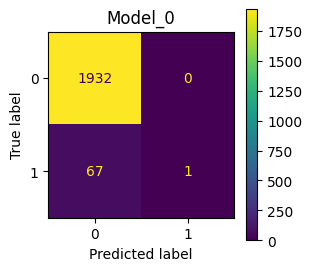

In [8]:
#make confusion matrix
cm_0 = confusion_matrix(y_test, y_pred, labels=model_0.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=model_0.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Model_0')  #can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [9]:
# Get accuracy, precision, recall and f1 score


#Print metrics for model_0
#(y_true, y_pred)
print("Model_0 accuracy : ", accuracy_score(y_test, y_pred))
print("Model_0 precision :", precision_score(y_test, y_pred))
print("Model_0 recall :   ", recall_score(y_test, y_pred))
print("Model_0 f1_score : ", f1_score(y_test, y_pred))


#We have a high accuracy but this does not mean this model performs well since the data set is highly unbalanced and
#Probably this model is really good at predicting which machines won't fail but is very bad predicting which machines 
#will fail (see recall score), we actually want to trade some precision for a better performance in recall 
#since predicting which machines will fail is more important for this problem and also we would rather predict that a machine 
#will fail and have that machine not failing than the other way around

Model_0 accuracy :  0.9665
Model_0 precision : 1.0
Model_0 recall :    0.014705882352941176
Model_0 f1_score :  0.028985507246376812


### GridSearch

In [11]:
#Using GridSearch to find the parameters that will have better performance for this model
# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.01, 0.1, 10],
              'kernel': ['linear', 'sigmoid', 'poly', 'rbf'],
              'degree': [3, 4], 'gamma': [0.01, 0.1, 10]}

#Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object

grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='recall')
grid_search.fit(X_train, y_train.values.ravel())  # fit the grid search object to the data

print("best params :", grid_search.best_params_)
print("best estimator :", grid_search.best_estimator_)

#estimate time 25 min

best params : {'C': 10, 'degree': 4, 'gamma': 10, 'kernel': 'poly'}
best estimator : SVC(C=10, degree=4, gamma=10, kernel='poly')


### Hyperparameter Tunning

In [10]:
# let's see how the optimized parameters do
model_1 = SVC(C=10, degree=4, gamma=10, kernel='poly')  #create default model

In [11]:
model_1.fit(X_train, y_train.values.ravel())  #train model

SVC(C=10, degree=4, gamma=10, kernel='poly')

In [12]:
y_pred_1 = model_1.predict(X_test)  #make predictions

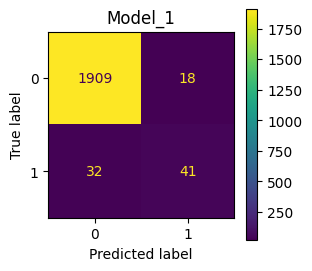

In [13]:
#make confusion matrix
cm_1 = confusion_matrix(y_test, y_pred_1, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=model_1.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Model_1')  #can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [14]:
#Print metrics for model_1
#(y_true, y_pred)
print("Model_1 accuracy : ", accuracy_score(y_test, y_pred_1))
print("Model_1 precision :", precision_score(y_test, y_pred_1))
print("Model_1 recall :   ", recall_score(y_test, y_pred_1))
print("Model_1 f1_score : ", f1_score(y_test, y_pred_1))

Model_1 accuracy :  0.975
Model_1 precision : 0.6949152542372882
Model_1 recall :    0.5616438356164384
Model_1 f1_score :  0.6212121212121213


In [10]:
# let's try to play a little bit with the hyperparameters to see with we can increase the recall without sacrificing too much
# Precision
model_2 = SVC(C=20, degree=4, gamma=20, kernel='poly')  #create default model
model_2.fit(X_train, y_train.values.ravel())  #train model
y_pred_2 = model_2.predict(X_test)  #make predictions

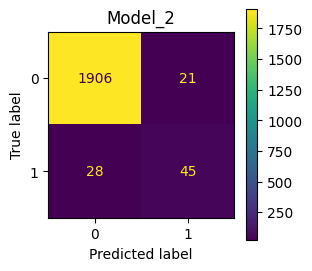

In [11]:
#make confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model_2.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Model_2')  #can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [12]:
#Print metrics for model_2
#(y_true, y_pred)
print("Model_2 accuracy : ", accuracy_score(y_test, y_pred_2))
print("Model_2 precision :", precision_score(y_test, y_pred_2))
print("Model_2 recall :   ", recall_score(y_test, y_pred_2))
print("Model_2 f1_score : ", f1_score(y_test, y_pred_2))


#From tunning hyperparameters C & Gamma we see that we obtain a better recall so let's try to train one more model
#And see how much more we can improve the recall for this data set using SVM's

Model_2 accuracy :  0.9755
Model_2 precision : 0.6818181818181818
Model_2 recall :    0.6164383561643836
Model_2 f1_score :  0.6474820143884891


In [13]:
#Let's also measure how much time does the PC take to train this model
model_3 = SVC(C=80, degree=4, gamma=80, kernel='poly')  #create default model
start = time.time()
model_3.fit(X_train, y_train.values.ravel())  #train model
end = time.time()
y_pred_3 = model_3.predict(X_test)  #make predictions

In [15]:
print("Minutes for training model_3: ", (end - start) / 60)

Minutes for training model_3:  43.957631778717044


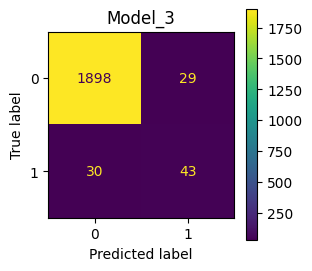

In [16]:
#make confusion matrix
cm_3 = confusion_matrix(y_test, y_pred_3, labels=model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=model_3.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Model_3')  #can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [17]:
#Print metrics for model_3
#(y_true, y_pred)
print("Model_3 accuracy : ", accuracy_score(y_test, y_pred_3))
print("Model_3 precision :", precision_score(y_test, y_pred_3))
print("Model_3 recall :   ", recall_score(y_test, y_pred_3))
print("Model_3 f1_score : ", f1_score(y_test, y_pred_3))


#Now we can see that rather than improving recall it decreased so let's make a final model with all the info we have now

Model_3 accuracy :  0.9705
Model_3 precision : 0.5972222222222222
Model_3 recall :    0.589041095890411
Model_3 f1_score :  0.593103448275862


In [13]:
model_4 = SVC(C=40, degree=4, gamma=40, kernel='poly')  #create default model
start = time.time()
model_4.fit(X_train, y_train.values.ravel())  #train model
end = time.time()
y_pred_4 = model_4.predict(X_test)  #make predictions

print("Minutes for training model_4: ", (end - start) / 60)

Minutes for training model_4:  27.653026044368744


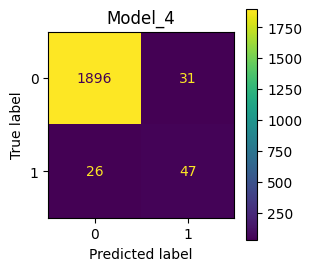

In [14]:
#make confusion matrix
cm_4 = confusion_matrix(y_test, y_pred_4, labels=model_4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_4, display_labels=model_4.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Model_4')  #can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [15]:
#Print metrics for model_4
#(y_true, y_pred)
print("Model_4 accuracy : ", accuracy_score(y_test, y_pred_4))
print("Model_4 precision :", precision_score(y_test, y_pred_4))
print("Model_4 recall :   ", recall_score(y_test, y_pred_4))
print("Model_4 f1_score : ", f1_score(y_test, y_pred_4))

Model_4 accuracy :  0.9715
Model_4 precision : 0.6025641025641025
Model_4 recall :    0.6438356164383562
Model_4 f1_score :  0.6225165562913907


In [8]:
model_5 = SVC(C=30, degree=4, gamma=30, kernel='poly')  #create default model
start = time.time()
model_5.fit(X_train, y_train.values.ravel())  #train model
end = time.time()
y_pred_5 = model_5.predict(X_test)  #make predictions

print("Minutes for training model_5: ", (end - start) / 60)

Minutes for training model_5:  50.89790127674738


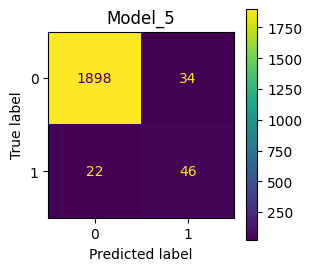

In [12]:
#make confusion matrix
cm_5 = confusion_matrix(y_test, y_pred_5, labels=model_5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_5, display_labels=model_5.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Model_5')  #can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [11]:
#Print metrics for model_4
#(y_true, y_pred)
print("Model_5 accuracy : ", accuracy_score(y_test, y_pred_5))
print("Model_5 precision :", precision_score(y_test, y_pred_5))
print("Model_5 recall :   ", recall_score(y_test, y_pred_5))
print("Model_5 f1_score : ", f1_score(y_test, y_pred_5))

Model_5 accuracy :  0.972
Model_5 precision : 0.575
Model_5 recall :    0.6764705882352942
Model_5 f1_score :  0.6216216216216216


In [13]:
 #Save model

dump(model_5, 'svm_5.joblib')

['svm_5.joblib']

In [12]:
#According to several correlation tests the top 5 features in the data set are:
#best features are:
#                    Feature  Total
#1              Torque [Nm]      6
#2      Air temperature [K]      5
#3          Tool wear [min]      4
#4   Rotational speed [rpm]      4
#5  Process temperature [K]      4

#Let's try training our best model using only this features
X_BestFeat = X.loc[:, ['Torque [Nm]', 'Air temperature [K]',
                       'Tool wear [min]', 'Rotational speed [rpm]', 'Process temperature [K]']]

X_BestFeat.head(5)

,Torque [Nm],Air temperature [K],Tool wear [min],Rotational speed [rpm],Process temperature [K]
0,0.535714,0.304348,0.000000,0.222934,0.358025
1,0.583791,0.315217,0.011858,0.139697,0.370370
2,0.626374,0.304348,0.019763,0.192084,0.345679
3,0.490385,0.315217,0.027668,0.154249,0.358025
4,0.497253,0.315217,0.035573,0.139697,0.370370


In [13]:
#Now let's train the model again

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

model_5_1 = SVC(C=30, degree=4, gamma=30, kernel='poly')  #create default model
start = time.time()
model_5_1.fit(X_train, y_train.values.ravel())  #train model
end = time.time()
y_pred_5_1 = model_5_1.predict(X_test)  #make predictions

print("Minutes for training model_5: ", (end - start) / 60)

Minutes for training model_5:  58.97205685774485


In [14]:
#Print metrics for model_4
#(y_true, y_pred)
print("Model_5_1 accuracy : ", accuracy_score(y_test, y_pred_5_1))
print("Model_5_1 precision :", precision_score(y_test, y_pred_5_1))
print("Model_5_1 recall :   ", recall_score(y_test, y_pred_5_1))
print("Model_5_1 f1_score : ", f1_score(y_test, y_pred_5_1))

Model_5_1 accuracy :  0.972
Model_5_1 precision : 0.575
Model_5_1 recall :    0.6764705882352942
Model_5_1 f1_score :  0.6216216216216216
